In [1]:
# import needed modules
import pandas as pd
import numpy as np
import os, itertools
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
import random
from tqdm import tqdm

# to plot better figures
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

### Ribo1C

In [2]:
# defining input paths for both dna and ribo
dna_rev_filepath = "/lustre/bio_running/DNA_Ribo_2023/DNA_only_new/f5c_eval_wflags/DNA_only_new.eventalign.rev_strand"
ribo_rev_filepath = "/lustre/bio_running/DNA_Ribo_2023/RIBO1C/f5c_eval_wflags/RIBO1C.eventalign.rev_strand"

In [3]:
# loading downsampled eventalign table into dataframes and collapsing their events (dna)
dna_rev = pd.read_table(dna_rev_filepath+".ribo1c.downsampled.roi.collapsed")
dna_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4992,CGCGCA,00046ab2-a826-4168-a45c-1aedb540db77,94.828308,1.833814,13
1,M13mp18,4998,TTAAAG,00046ab2-a826-4168-a45c-1aedb540db77,100.292200,1.597808,4
2,M13mp18,5008,ATAGCC,00046ab2-a826-4168-a45c-1aedb540db77,94.527755,2.095942,11
3,M13mp18,4992,CGCGCA,0006f906-0472-4237-95ea-1fccab663392,93.921628,1.698862,18
4,M13mp18,4998,TTAAAG,0006f906-0472-4237-95ea-1fccab663392,98.595217,1.296829,6
...,...,...,...,...,...,...,...
26919,M13mp18,4992,CGCGCA,fff3b853-261a-41df-9e34-86ff984c5690,91.695867,2.594055,3
26920,M13mp18,4998,TTAAAG,fff3b853-261a-41df-9e34-86ff984c5690,98.835308,1.044099,13
26921,M13mp18,5008,ATAGCC,fff3b853-261a-41df-9e34-86ff984c5690,95.996760,1.030996,5
26922,M13mp18,4992,CGCGCA,fffaf226-079e-4faa-9d1d-1438dfd9f05d,93.952000,0.317590,3


In [4]:
# ribo
ribo_rev = pd.read_table(ribo_rev_filepath+".downsampled.roi.collapsed")
ribo_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4998,TTAAAG,00098585-7c0f-4999-b946-2bc129adb6cf,98.583300,0.580915,3
1,M13mp18,4998,TTAAAG,0009e78b-f545-4392-b7c5-2aef81421f31,101.752690,2.846634,10
2,M13mp18,4992,CGCGCA,00210489-35bc-4634-8386-80c8b927a258,94.481179,3.265804,24
3,M13mp18,4998,TTAAAG,00210489-35bc-4634-8386-80c8b927a258,99.968541,1.898214,27
4,M13mp18,4992,CGCGCA,002b456e-2753-4fb2-8550-332b2529058d,91.929321,1.168840,14
...,...,...,...,...,...,...,...
21874,M13mp18,4992,CGCGCA,ffd48def-318a-488d-8435-9d5601dfb170,94.258489,1.146911,18
21875,M13mp18,4998,TTAAAG,ffd48def-318a-488d-8435-9d5601dfb170,96.870788,2.081805,8
21876,M13mp18,5008,ATAGCC,ffd48def-318a-488d-8435-9d5601dfb170,94.116709,0.861163,11
21877,M13mp18,4992,CGCGCA,ffe3c7fe-2928-424f-b6a1-773e333d88c0,96.806300,3.594002,10


In [5]:
# convert to 1-based
dna_rev["position"] += 1
dna_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4993,CGCGCA,00046ab2-a826-4168-a45c-1aedb540db77,94.828308,1.833814,13
1,M13mp18,4999,TTAAAG,00046ab2-a826-4168-a45c-1aedb540db77,100.292200,1.597808,4
2,M13mp18,5009,ATAGCC,00046ab2-a826-4168-a45c-1aedb540db77,94.527755,2.095942,11
3,M13mp18,4993,CGCGCA,0006f906-0472-4237-95ea-1fccab663392,93.921628,1.698862,18
4,M13mp18,4999,TTAAAG,0006f906-0472-4237-95ea-1fccab663392,98.595217,1.296829,6
...,...,...,...,...,...,...,...
26919,M13mp18,4993,CGCGCA,fff3b853-261a-41df-9e34-86ff984c5690,91.695867,2.594055,3
26920,M13mp18,4999,TTAAAG,fff3b853-261a-41df-9e34-86ff984c5690,98.835308,1.044099,13
26921,M13mp18,5009,ATAGCC,fff3b853-261a-41df-9e34-86ff984c5690,95.996760,1.030996,5
26922,M13mp18,4993,CGCGCA,fffaf226-079e-4faa-9d1d-1438dfd9f05d,93.952000,0.317590,3


In [6]:
ribo_rev["position"] += 1
ribo_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4999,TTAAAG,00098585-7c0f-4999-b946-2bc129adb6cf,98.583300,0.580915,3
1,M13mp18,4999,TTAAAG,0009e78b-f545-4392-b7c5-2aef81421f31,101.752690,2.846634,10
2,M13mp18,4993,CGCGCA,00210489-35bc-4634-8386-80c8b927a258,94.481179,3.265804,24
3,M13mp18,4999,TTAAAG,00210489-35bc-4634-8386-80c8b927a258,99.968541,1.898214,27
4,M13mp18,4993,CGCGCA,002b456e-2753-4fb2-8550-332b2529058d,91.929321,1.168840,14
...,...,...,...,...,...,...,...
21874,M13mp18,4993,CGCGCA,ffd48def-318a-488d-8435-9d5601dfb170,94.258489,1.146911,18
21875,M13mp18,4999,TTAAAG,ffd48def-318a-488d-8435-9d5601dfb170,96.870788,2.081805,8
21876,M13mp18,5009,ATAGCC,ffd48def-318a-488d-8435-9d5601dfb170,94.116709,0.861163,11
21877,M13mp18,4993,CGCGCA,ffe3c7fe-2928-424f-b6a1-773e333d88c0,96.806300,3.594002,10


In [7]:
# add sample/run label
dna_rev["run"] = "DNA"
ribo_rev["run"] = "RIBO"

### Produce mixed datasets

In [8]:
mixed_datasets = {}
for perc in [80, 60, 40, 20]:
    perc_ribo = 100-perc
    # take perc reads from dna and 100-perc from ribo
    print(f"Producing mix_dna_ribo_{perc}_{perc_ribo}")
    dna_reads = random.sample(set(dna_rev["read_name"].values), perc*100)
    ribo_reads = random.sample(set(ribo_rev["read_name"].values), perc_ribo*100)
    print(len(dna_reads), len(ribo_reads), len(dna_reads)+len(ribo_reads))
    dna_rev_subsample = dna_rev[dna_rev['read_name'].isin(dna_reads)]
    ribo_rev_subsample = ribo_rev[ribo_rev['read_name'].isin(ribo_reads)]
    # append to dictionary of mixed datasets
    mixed_datasets[f"mix_dna_ribo_{perc}_{perc_ribo}"] = pd.concat([dna_rev_subsample, ribo_rev_subsample]).reset_index(drop=True)
    print(mixed_datasets[f"mix_dna_ribo_{perc}_{perc_ribo}"]["run"].value_counts())
    print()
# add mix_dna_ribo_100_0 and mix_dna_ribo_0_100
mixed_datasets["mix_dna_ribo_100_0"] = dna_rev.copy()
mixed_datasets["mix_dna_ribo_0_100"] = ribo_rev.copy()
mixed_datasets

Producing mix_dna_ribo_80_20
8000 2000 10000
DNA     22116
RIBO     4927
Name: run, dtype: int64

Producing mix_dna_ribo_60_40
6000 4000 10000
DNA     16590
RIBO     9934
Name: run, dtype: int64

Producing mix_dna_ribo_40_60
4000 6000 10000
RIBO    14878
DNA     11104
Name: run, dtype: int64

Producing mix_dna_ribo_20_80
2000 8000 10000
RIBO    19821
DNA      5548
Name: run, dtype: int64



{'mix_dna_ribo_80_20':         contig  position reference_kmer                             read_name  \
 0      M13mp18      4993         CGCGCA  00046ab2-a826-4168-a45c-1aedb540db77   
 1      M13mp18      4999         TTAAAG  00046ab2-a826-4168-a45c-1aedb540db77   
 2      M13mp18      5009         ATAGCC  00046ab2-a826-4168-a45c-1aedb540db77   
 3      M13mp18      4993         CGCGCA  0006f906-0472-4237-95ea-1fccab663392   
 4      M13mp18      4999         TTAAAG  0006f906-0472-4237-95ea-1fccab663392   
 ...        ...       ...            ...                                   ...   
 27038  M13mp18      4999         TTAAAG  ff84357f-a246-4808-a122-bd34a28bca54   
 27039  M13mp18      5009         ATAGCC  ff84357f-a246-4808-a122-bd34a28bca54   
 27040  M13mp18      4993         CGCGCA  ffb63a1a-1b8c-4a8f-865a-a1245be9b38c   
 27041  M13mp18      4999         TTAAAG  ffb63a1a-1b8c-4a8f-865a-a1245be9b38c   
 27042  M13mp18      5009         ATAGCC  ffb63a1a-1b8c-4a8f-865a-a1245be9b3

### Currents intensities

In [9]:
# define altered sites coordinates and its corresponding actual incorporation site for currents (1-based)
sites_curr = [4993, 5009]
actual_sites = [4996, 5007]

Processing Actual site: 4996 on altered position: M13mp18:4993
mix_dna_ribo_100_0 (9442, 8)
mix_dna_ribo_80_20 (9531, 8)
mix_dna_ribo_60_40 (9414, 8)
mix_dna_ribo_40_60 (9244, 8)
mix_dna_ribo_20_80 (9098, 8)
mix_dna_ribo_0_100 (7904, 8)


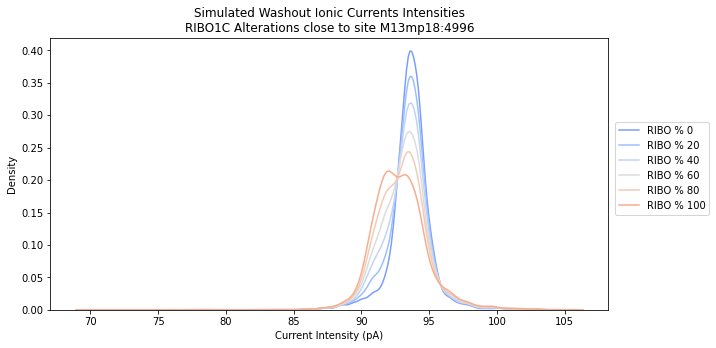

Processing Actual site: 5007 on altered position: M13mp18:5009
mix_dna_ribo_100_0 (8288, 8)
mix_dna_ribo_80_20 (8150, 8)
mix_dna_ribo_60_40 (7835, 8)
mix_dna_ribo_40_60 (7544, 8)
mix_dna_ribo_20_80 (7173, 8)
mix_dna_ribo_0_100 (6024, 8)


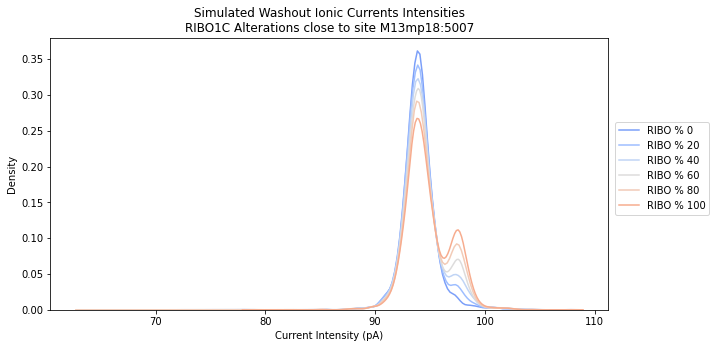

In [10]:
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

for s_, as_ in zip(sites_curr, actual_sites):
    print(f"Processing Actual site: {as_} on altered position: M13mp18:{s_}")
    plt.figure(figsize=(10,5))
    for mix,color, perc in zip([f"mix_dna_ribo_{perc}_{100-perc}" for perc in [100,80,60,40,20,0]], colors, [100,80,60,40,20,0]):
        print(mix, mixed_datasets[mix].query(f"position == {s_}").shape)
        sn.kdeplot(data=mixed_datasets[mix].query(f"position == {s_}"), x="event_level_mean", label=f"RIBO % {100-perc}", color=color)
    plt.legend(bbox_to_anchor=(1.19, 0.71))
    plt.xlabel("Current Intensity (pA)")
    plt.title(f"Simulated Washout Ionic Currents Intensities\nRIBO1C Alterations close to site M13mp18:{as_}")
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.ionic_currents.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

Processing Actual site: 4996 on altered position: M13mp18:4993
Processing Actual site: 5007 on altered position: M13mp18:5009


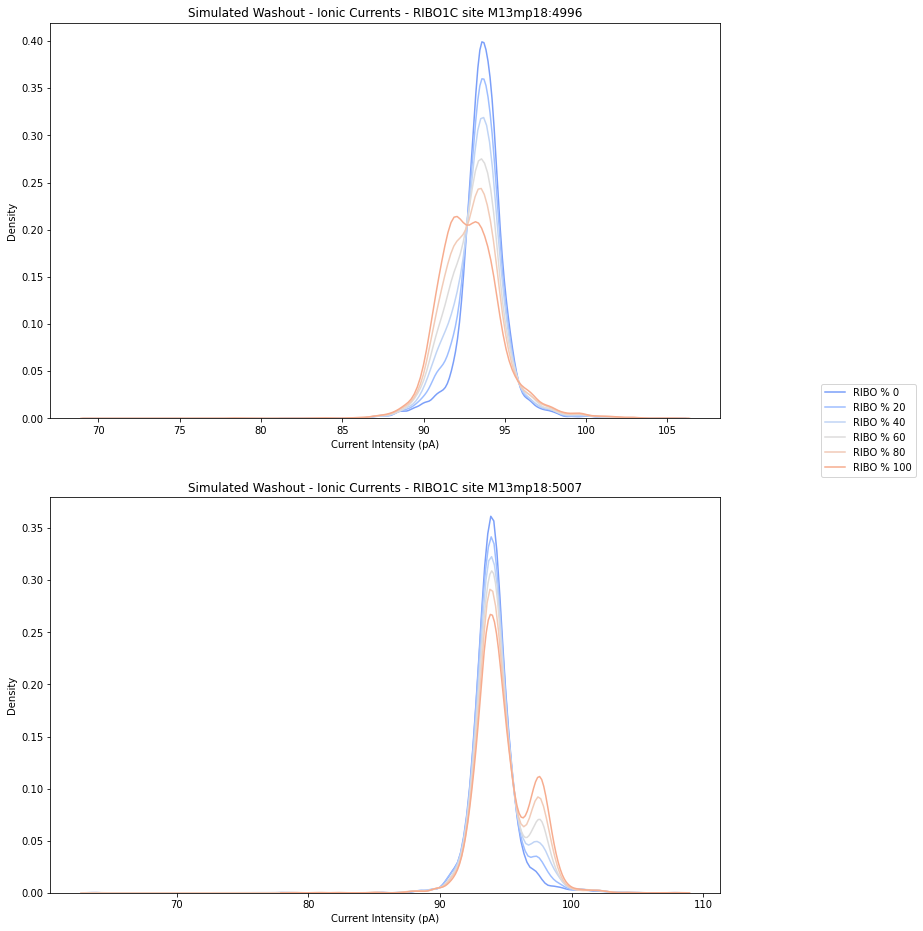

In [11]:
# produce a single plot for currents
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

n_rows=2
n_cols=1
axes_pos = list([i for i in range(n_rows)])
f, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,16))
for s_, as_, ax_pos in zip(sites_curr, actual_sites, axes_pos):
    print(f"Processing Actual site: {as_} on altered position: M13mp18:{s_}")
    for mix,color, perc in zip([f"mix_dna_ribo_{perc}_{100-perc}" for perc in [100,80,60,40,20,0]], colors, [100,80,60,40,20,0]):
        #print(mix, mixed_datasets[mix].query(f"position == {s_}").shape)
        sn.kdeplot(data=mixed_datasets[mix].query(f"position == {s_}"), 
                   x="event_level_mean", 
                   label=f"RIBO % {100-perc}", 
                   color=color,
                   ax=axes[ax_pos])
    axes[ax_pos].set_xlabel("Current Intensity (pA)")
    axes[ax_pos].set_title(f"Simulated Washout - Ionic Currents - RIBO1C site M13mp18:{as_}")

plt.legend(bbox_to_anchor=(1.3, 1.3))
# save image to disk
plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1C_site_M13mp18_all_contexts.reverse.ionic_currents.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

### Dwell times

In [12]:
# define altered sites coordinates and its corresponding actual incorporation site for currents (1-based)
sites_curr = [4999, 5009]
actual_sites = [4996, 5007]

In [13]:
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

# merge into uniq dataset
mixed_datasets_merged = []
for perc in [100,80,60,40,20,0]:
    mix = mixed_datasets[f"mix_dna_ribo_{perc}_{100-perc}"].copy()
    mix["RIBO_Perc"] = 100-perc
    mixed_datasets_merged.append(mix)
mixed_datasets_merged = pd.concat(mixed_datasets_merged).reset_index(drop=True)
mixed_datasets_merged

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,run,RIBO_Perc
0,M13mp18,4993,CGCGCA,00046ab2-a826-4168-a45c-1aedb540db77,94.828308,1.833814,13,DNA,0
1,M13mp18,4999,TTAAAG,00046ab2-a826-4168-a45c-1aedb540db77,100.292200,1.597808,4,DNA,0
2,M13mp18,5009,ATAGCC,00046ab2-a826-4168-a45c-1aedb540db77,94.527755,2.095942,11,DNA,0
3,M13mp18,4993,CGCGCA,0006f906-0472-4237-95ea-1fccab663392,93.921628,1.698862,18,DNA,0
4,M13mp18,4999,TTAAAG,0006f906-0472-4237-95ea-1fccab663392,98.595217,1.296829,6,DNA,0
...,...,...,...,...,...,...,...,...,...
153716,M13mp18,4993,CGCGCA,ffd48def-318a-488d-8435-9d5601dfb170,94.258489,1.146911,18,RIBO,100
153717,M13mp18,4999,TTAAAG,ffd48def-318a-488d-8435-9d5601dfb170,96.870788,2.081805,8,RIBO,100
153718,M13mp18,5009,ATAGCC,ffd48def-318a-488d-8435-9d5601dfb170,94.116709,0.861163,11,RIBO,100
153719,M13mp18,4993,CGCGCA,ffe3c7fe-2928-424f-b6a1-773e333d88c0,96.806300,3.594002,10,RIBO,100


In [14]:
# save on disk
for s_, as_ in zip(sites_curr, actual_sites):
    mixed_datasets_merged.to_csv(f"/lustre/biomed/ForBruno/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.dwell_times.tsv", sep="\t", index=None)

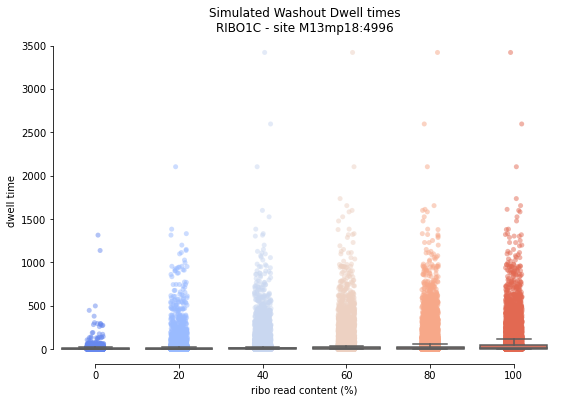

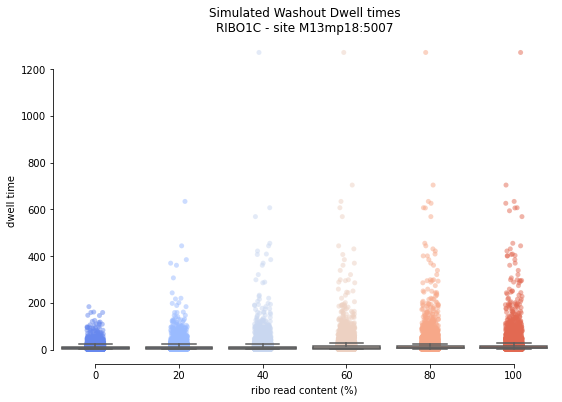

In [15]:
for s_, as_ in zip(sites_curr, actual_sites):
    plt.figure(figsize=(9,6))
    sn.stripplot(data=mixed_datasets_merged.query(f"position == {s_}"), x="RIBO_Perc", y="dwell", zorder=0, palette="coolwarm", alpha=.5)
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", showfliers=False)
    plt.ylabel("dwell time")
    plt.xlabel("ribo read content (%)")
    plt.title(f"Simulated Washout Dwell times\nRIBO1C - site M13mp18:{as_}")
    sn.despine(trim=True)
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.dwell_times.V1.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

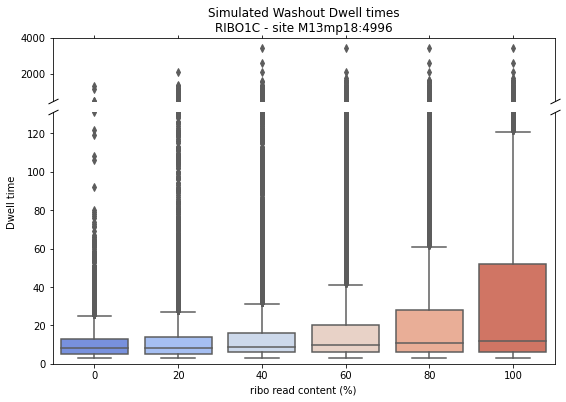

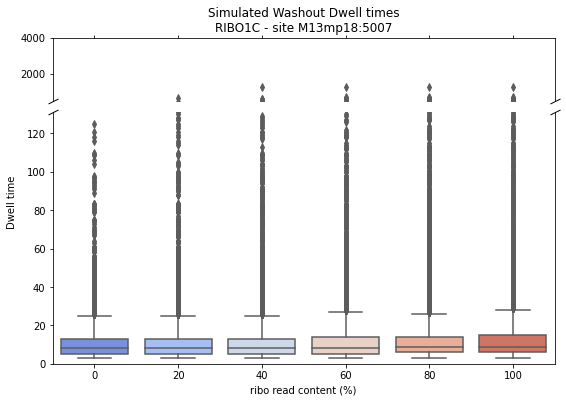

In [16]:
# with broken y axis
for s_, as_ in zip(sites_curr, actual_sites):
    f, (ax, ax2) = plt.subplots(2,1, sharex=True, facecolor='w', figsize=(9,6), gridspec_kw={'height_ratios': [0.5, 2]})
    f.subplots_adjust(hspace=0.075)

    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax)
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax2)
    ax.set(xlabel=None)
    
    # set limits
    ax2.set_ylim(0, 131)
    ax.set_ylim(500, 4000)

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # hide ticks
    ax.xaxis.tick_bottom()
    ax.xaxis.tick_top()
    ax.set(ylabel=None)
    ax2.set(ylabel=None)

    f.text(0.055, 0.5, 'Dwell time', va='center', rotation='vertical', )
    ax2.set_xlabel("ribo read content (%)")
    ax.set_title(f'Simulated Washout Dwell times\nRIBO1C - site M13mp18:{as_}')

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.dwell_times.V2.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

4999
6.0 52.0 87.0


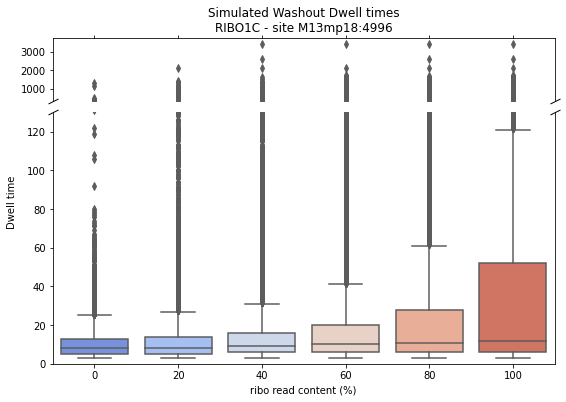

5009
6.0 15.0 31.5


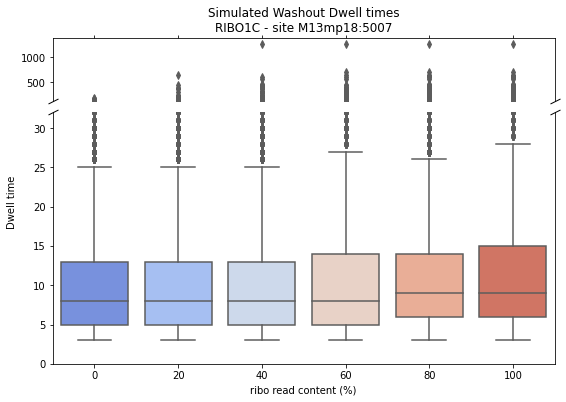

In [17]:
# with broken y axis (v2 dynamic)
for s_, as_ in zip(sites_curr, actual_sites):
    print(s_)
    f, (ax, ax2) = plt.subplots(2,1, sharex=True, facecolor='w', figsize=(9,6), gridspec_kw={'height_ratios': [0.5, 2]})
    f.subplots_adjust(hspace=0.075)
    max_ = mixed_datasets_merged.query(f"position == {s_}")["dwell"].max()
    perc25 = mixed_datasets_merged.query(f"position == {s_}").query("RIBO_Perc == 100")["dwell"].describe()["25%"]
    perc75 = mixed_datasets_merged.query(f"position == {s_}").query("RIBO_Perc == 100")["dwell"].describe()["75%"]
    iqr = (perc25+perc75)*1.5
    print(perc25, perc75, iqr)
    
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax)
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax2)
    ax.set(xlabel=None)
    
    # set limits
    if int(iqr*1.5) <= 100:
        ax2.set_ylim(0, 32)
    else:
        ax2.set_ylim(0, int(iqr*1.5))
    ax.set_ylim(int(iqr*4), int(max_*1.1))
    
    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # hide ticks
    ax.xaxis.tick_bottom()
    ax.xaxis.tick_top()
    ax.set(ylabel=None)
    ax2.set(ylabel=None)

    f.text(0.055, 0.5, 'Dwell time', va='center', rotation='vertical', )
    ax2.set_xlabel("ribo read content (%)")
    ax.set_title(f'Simulated Washout Dwell times\nRIBO1C - site M13mp18:{as_}')

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.dwell_times.V2dynamic.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

4999
6.0 52.0 87.0


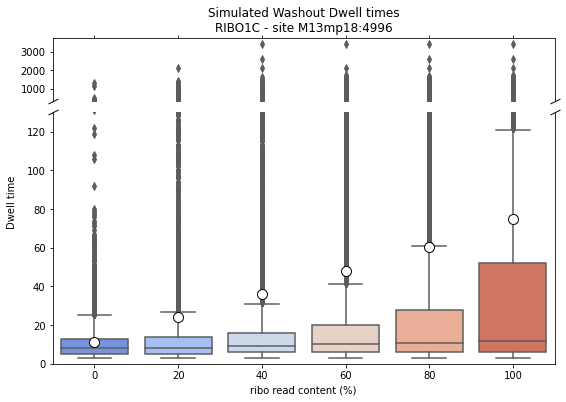

5009
6.0 15.0 31.5


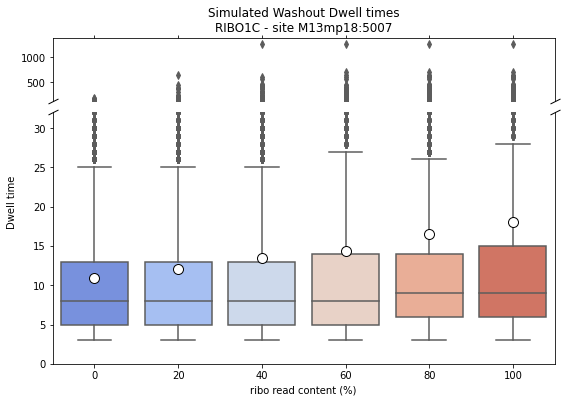

In [18]:
# with broken y axis (v2 dynamic w mean)
for s_, as_ in zip(sites_curr, actual_sites):
    print(s_)
    f, (ax, ax2) = plt.subplots(2,1, sharex=True, facecolor='w', figsize=(9,6), gridspec_kw={'height_ratios': [0.5, 2]})
    f.subplots_adjust(hspace=0.075)
    max_ = mixed_datasets_merged.query(f"position == {s_}")["dwell"].max()
    perc25 = mixed_datasets_merged.query(f"position == {s_}").query("RIBO_Perc == 100")["dwell"].describe()["25%"]
    perc75 = mixed_datasets_merged.query(f"position == {s_}").query("RIBO_Perc == 100")["dwell"].describe()["75%"]
    iqr = (perc25+perc75)*1.5
    print(perc25, perc75, iqr)
    
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax)
    sn.boxplot(data=mixed_datasets_merged.query(f"position == {s_}"), 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", ax=ax2, showmeans=True, 
               meanprops={"marker":"o",
                          "markerfacecolor":"white", 
                          "markeredgecolor":"black",
                          "markersize":"10"})
    ax.set(xlabel=None)
    
    # set limits
    if int(iqr*1.5) <= 100:
        ax2.set_ylim(0, 32)
    else:
        ax2.set_ylim(0, int(iqr*1.5))
    ax.set_ylim(int(iqr*4), int(max_*1.1))
    
    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # hide ticks
    ax.xaxis.tick_bottom()
    ax.xaxis.tick_top()
    ax.set(ylabel=None)
    ax2.set(ylabel=None)

    f.text(0.055, 0.5, 'Dwell time', va='center', rotation='vertical', )
    ax2.set_xlabel("ribo read content (%)")
    ax.set_title(f'Simulated Washout Dwell times\nRIBO1C - site M13mp18:{as_}')

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.dwell_times.V2dynamic.means.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

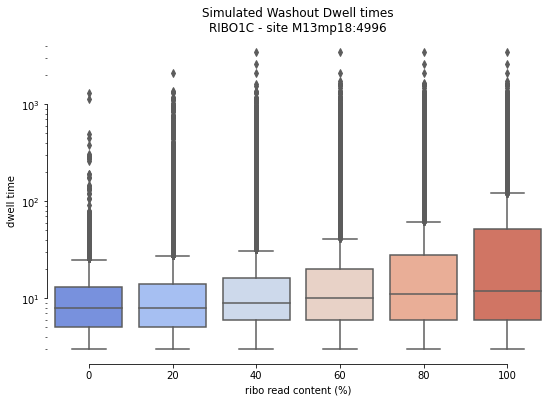

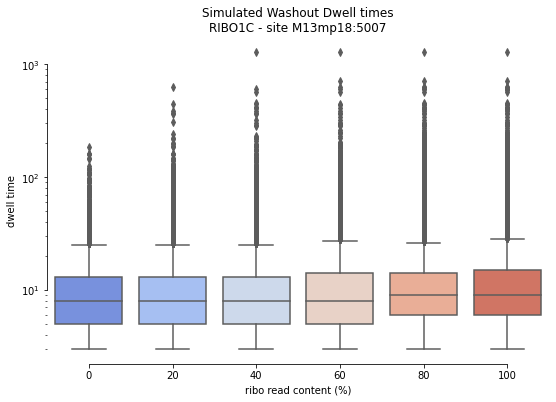

In [19]:
# v3 logscale
for s_, as_ in zip(sites_curr, actual_sites):
    plt.figure(figsize=(9,6))
    df_log = mixed_datasets_merged.query(f"position == {s_}")
    sn.boxplot(data=df_log, 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", showfliers=True)
    plt.yscale("log")
    plt.ylabel("dwell time")
    plt.xlabel("ribo read content (%)")
    plt.title(f"Simulated Washout Dwell times\nRIBO1C - site M13mp18:{as_}")
    sn.despine(trim=True)
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.dwell_times.V3logscale.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

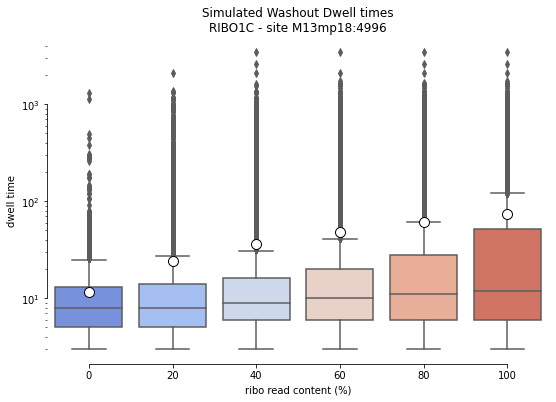

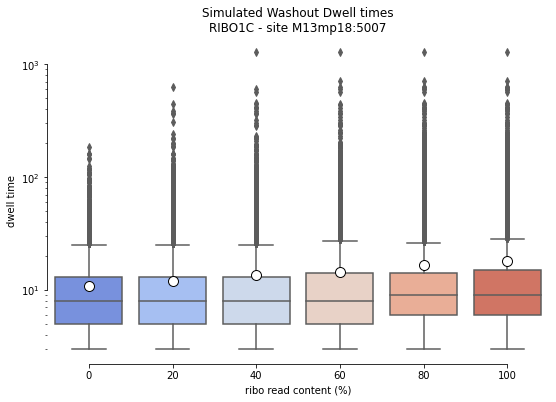

In [20]:
# v3 logscale with means
for s_, as_ in zip(sites_curr, actual_sites):
    plt.figure(figsize=(9,6))
    df_log = mixed_datasets_merged.query(f"position == {s_}")
    sn.boxplot(data=df_log, 
               x="RIBO_Perc",
               y="dwell",
               palette="coolwarm", showfliers=True,
               showmeans=True, 
               meanprops={"marker":"o",
                          "markerfacecolor":"white", 
                          "markeredgecolor":"black",
                          "markersize":"10"})
    plt.yscale("log")
    plt.ylabel("dwell time")
    plt.xlabel("ribo read content (%)")
    plt.title(f"Simulated Washout Dwell times\nRIBO1C - site M13mp18:{as_}")
    sn.despine(trim=True)
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout_REV2024/sim_washout_DNA_vs_RIBO1C_site_M13mp18_{as_}.reverse.dwell_times.V3logscale.means.tiff", 
                dpi=600, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()